# Las Vegas Restaurant Categories EDA

In [1]:
import pandas as pd
import pyspark.ml as M
import pyspark.sql.functions as F
import pyspark.sql.types as T
from pyspark.sql import SparkSession
import matplotlib.pyplot as plt

In [2]:
spark = SparkSession \
    .builder \
    .appName("yelp-reccomender") \
    .getOrCreate()

In [7]:
schema = T.StructType([
    T.StructField("_c01", T.IntegerType(), True),
    T.StructField("name", T.StringType(), True),
    T.StructField("business_id", T.StringType(), True),   
    T.StructField("city", T.StringType(), True),   
    T.StructField("categories", T.StringType(), True),
    T.StructField("review_id", T.StringType(), True),   
    T.StructField("text", T.StringType(), True),      
    T.StructField("stars", T.FloatType(), True)                    
])

In [8]:
lv = spark.read.csv("../data/raw/Las_Vegas_reviews.csv", header=True, multiLine=True, schema=schema, quote="\"", escape="\"")
# lv = spark.read.csv("../../../yelp_dataset/Phoenix_reviews_Cath.csv", header=True, multiLine=True, schema=schema, quote="\"", escape="\"")

In [9]:
# df = lv.filter(
#     (F.col('categories').contains('Restaurants')) |
#     (F.col('categories').contains('Food'))
# )
df = lv.withColumn('list_cat', F.split(lv.categories, ', ')) # string to list
df = df.withColumn('list_cat', F.explode_outer('list_cat')) # list to rows
indexer = M.feature.StringIndexer(inputCol="list_cat", outputCol="cat_num") # convert category to numerical indices
indexed = indexer.fit(df).transform(df)
encoder = M.feature.OneHotEncoder(inputCol="cat_num", outputCol="cat_onehot")
# params = {encoder.dropLast: False}
# encoded_df = encoder.transform(indexed, params)

In [10]:
params = {encoder.dropLast: False}
ohe = encoder.fit(indexed)
encoded_df = ohe.transform(indexed, params)

In [11]:
reverse_index = M.feature.IndexToString(inputCol='cat_num', outputCol='cat_names')

In [12]:
cat_group = indexed[['cat_num', 'stars']].groupby("cat_num").agg(
    F.count('cat_num').alias('count'), 
    F.mean("stars").alias('avg_stars')
)
names_df = reverse_index.transform(cat_group)

In [13]:
inter = names_df.orderBy(F.desc("count")).take(12)

In [14]:
df = pd.DataFrame(inter[1:])#[[2,1,0]]
df = df.rename(columns={3:'Category', 2:'Average Stars', 1:'Count', 0:'Category Index'})

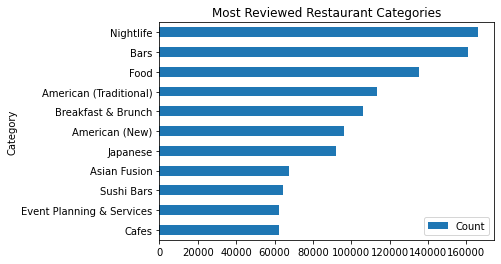

In [15]:
df.sort_values(by="Count", ascending=True).plot.barh(x="Category", y="Count")
plt.title('Most Reviewed Restaurant Categories')
plt.show()

In [24]:
inter1 = names_df.orderBy(F.desc("count"))
#df_1 = pd.DataFrame(inter[1:])#[[2,1,0]]


In [45]:
names_pandas

,cat_num,count,avg_stars,cat_names
0,170.0,380,3.736842,Trampoline Parks
1,184.0,232,3.672414,Home Services
2,147.0,732,3.267760,Gelato
3,169.0,380,3.936842,Country Clubs
4,160.0,532,4.691729,Car Wash
...,...,...,...,...
280,158.0,560,2.742857,Salvadoran
281,90.0,4244,3.870877,Food Stands
282,91.0,4180,4.042105,Acai Bowls
283,110.0,2392,3.856187,Ethnic Food


In [32]:
names_pandas = names_df.toPandas()

In [35]:
lv2 = pd.read_csv("../data/raw/Las_Vegas_reviews.csv")

In [44]:
lv2[lv2.categories.str.contains('Car Wash')].categories[405352]

'Car Wash, Gas Stations, Convenience Stores, Restaurants, Food, Delis, Automotive'

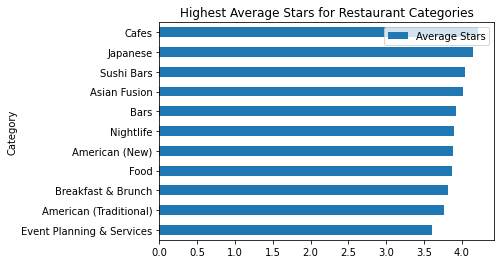

In [82]:
df.sort_values(by="Average Stars", ascending=True).plot.barh(x="Category", y="Average Stars")
plt.title('Highest Average Stars for Restaurant Categories')
plt.show()

In [ ]:
df.sort_values(by="Count", ascending=True).plot.barh(x="Category", y="Count")
plt.title('Most Reviewed Restaurant Categories')
plt.show()

In [3]:
# lv = pd.read_csv("../../../yelp_dataset/Las_Vegas_reviews.csv")
lv = pd.read_csv("../data/raw/Las_Vegas_reviews.csv")

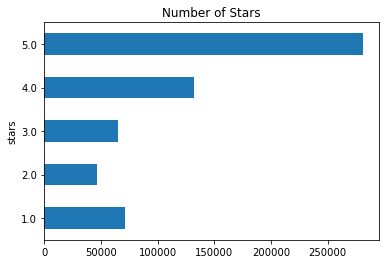

In [45]:
lv.groupby("stars")['review_id'].count().plot.barh()
plt.title('Number of Stars')
plt.show()

In [7]:
import json
# with open('../data/autophrase_in/reviews.txt', 'w') as f:
with open('../../DSC180A-Project/data/out/yelp_reviews1.txt', 'w') as f:
    i = 0
    for review in lv.text:
        f.write(review)
        f.write("\n.\n")
#         f.write("\n<REVIEW DELIMITER>\n")
#         else:
#             break
#     f.write(json.dumps(lv.text.to_dict()))

In [1]:
# with open('../data/autophrase_in/reviews.txt', 'w') as f:
#     f.write('test')
# with open('../data/autophrase_out/segmentation.txt', 'r') as f:
with open('../../DSC180A-Project/data/out/segmentation.txt', 'r') as f:
# with open('../../DSC180A-Project/data/in/yelp_reviews.txt', 'r') as f:
# with open('../../DSC180A-Project/data/in/yelp_reviews1.txt', 'r') as f:
    a = f.read()
    b = a.split("\n.\n")